# MATH 387 LAB 1
### Haruki Moriguchi, 260665818
### Feb. 16, 2018
---

#### Exercise 1: Taylor Polynomials

In [65]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [66]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [67]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [68]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [69]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [70]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

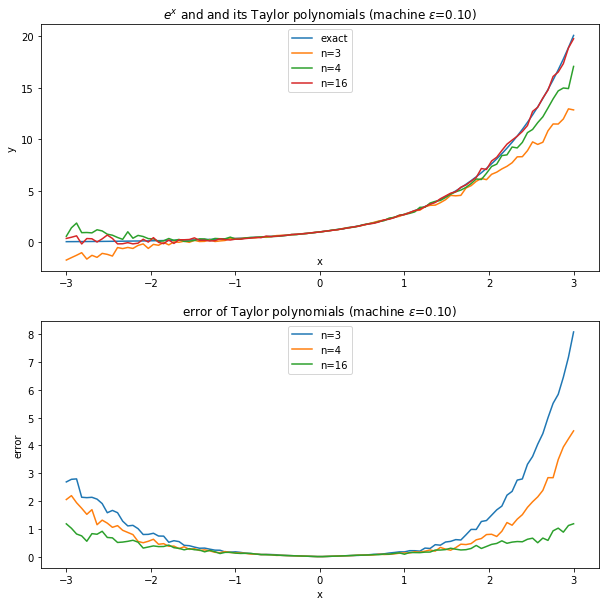

In [71]:
xlist = np.linspace(-3, 3, 100)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

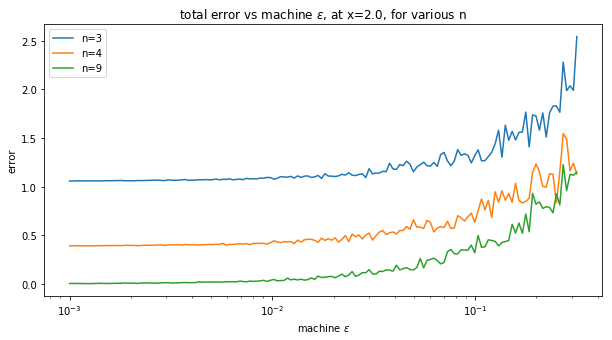

In [72]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

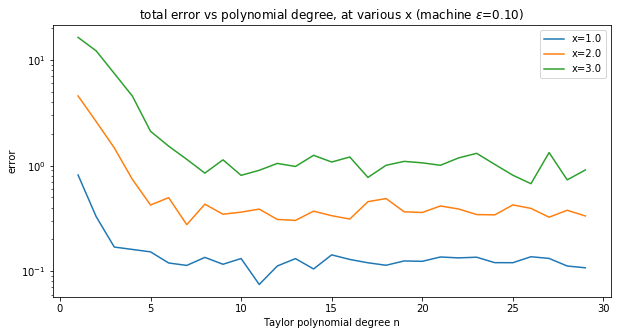

In [73]:
xlist = [1, 2, 3]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

### Questions
---

**2.**
We first notice for a fixed $\varepsilon = 0.1$ that as $x$ increases, the value of $n$ to reach the threshold error increases. Thus, for experimental purposes, we set $n=100$, so that the error is guaranteed to be in the threshold. We also set the $x$-axis to be logarithmic.

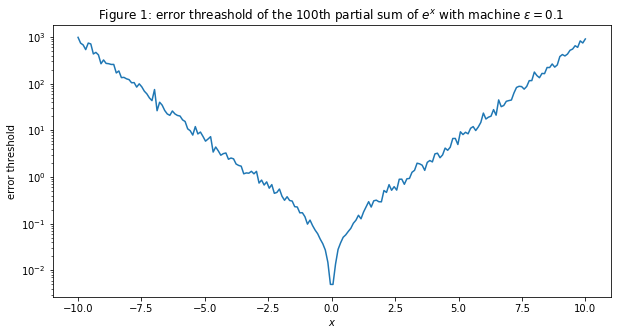

In [74]:
xlist = np.linspace(-10, 10, 200)
eps = 0.1
n = 100

kmax = 30

plt.figure(figsize=(10, 5))
y = np.abs(errxlist(n, xlist, eps))
for k in range(1, kmax):
    z = np.abs(errxlist(n, xlist, eps))
    y = np.maximum(y, z)
plt.plot(xlist, y)

plt.yscale('log')
plt.title(r'Figure 1: error threashold of the 100th partial sum of $e^x$ with machine $\varepsilon = 0.1$')
plt.xlabel(r'$x$')
plt.ylabel('error threshold')
plt.show()

From Figure 1, we can see that for $|x| > \sim2$, the graph is roughly linear (error thresholds increases as $|x|$ increases), implying that the error threshold to $x$ relationship is exponential. For $|x| < \sim 2$, the error threshold grows faster, but we can still say that the relationship is at least exponential.
Now we let $x$ stay fixed and see how the error threshold varies over machine $\varepsilon$.

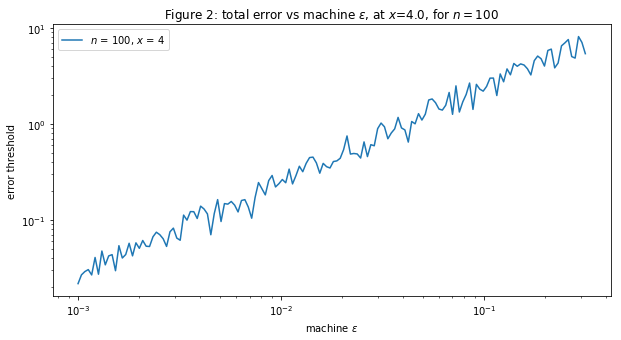

In [75]:
n = 100
elist = np.logspace(-3, -.5, 150)
x = 4
kmax = 20

plt.figure(figsize=(10,5))
y=np.abs(errelist(n,x,elist))
for k in range(1,kmax):
    z=np.abs(errelist(n,x,elist))
    y=np.maximum(y,z)
plt.plot(elist,y,label=r'$n$ = %d, $x$ = 4'%n,)

plt.xscale('log')
plt.yscale('log')
plt.title(r'Figure 2: total error vs machine $\varepsilon$, at $x$=%.1f, for $n = 100$'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error threshold')
plt.legend()
plt.show()

Based on Figure 2, since the $x$ and $y$-axes are both logarithmic and the graph seems linear, we can extrapolate that the error threshhold increases linearly with respect to machine $\varepsilon$

**3.** Now we study the behavior of $|e^x-\tilde{T}_n(x)|/e^x$. We modify errxlist, errelist, and errnlist to rel_errXlist, rel_errelist, and rel_errnlist, so that they include the absolute value and the division by $e^x$. We will then plot the graph similar to the ones in the question.

In [76]:
def rel_errxlist(n, xlist, eps):
    yy = []
    for x in xlist:
        e = np.exp(x)
        yy.append(np.abs(expser(n, x, eps) - e)/e)
    return yy

def rel_errelist(n, x, elist):
    yy = []
    for eps in elist: 
        e = np.exp(x)
        yy.append(np.abs(expser(n, x, eps) - e)/e)
    return yy

def rel_errnlist(nlist, x, eps):
    yy = []
    for n in nlist: 
        e = np.exp(x)
        yy.append(np.abs(expser(n, x, eps) - e)/e)
    return yy

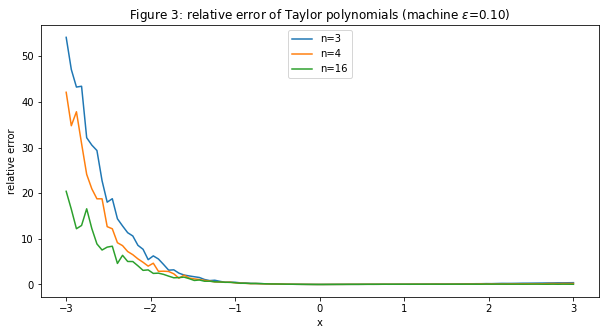

In [77]:
# ----------------------- Figure 3 ------------------------
xlist = np.linspace(-3, 3, 100)
nlist = [3,4,16]
eps=.1
kmax=30

plt.figure(figsize=(10,5))

for n in nlist: 
    y=np.abs(rel_errxlist(n,xlist,eps)) # change errxlist to rel_errxlist here
    for k in range(1,kmax):
        z=np.abs(rel_errxlist(n,xlist,eps)) # change errxlist to rel_errxlist here
        y=np.maximum(y,z)
    plt.plot(xlist,y,label='n=%d'%n)

plt.title(r'Figure 3: relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('x')
plt.ylabel('relative error')
plt.legend(loc="upper center")
plt.show()

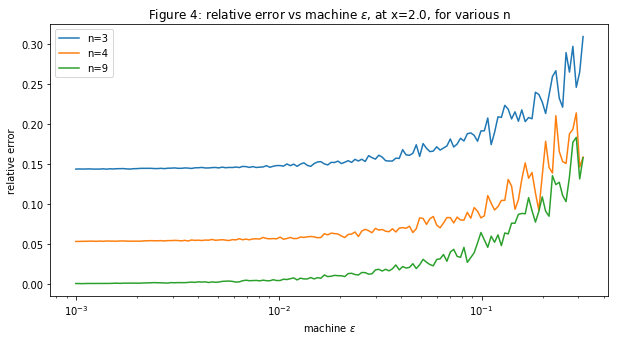

In [78]:
# ----------------------- Figure 4 ------------------------
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(rel_errelist(n,x,elist)) # change errelist to rel_errelist here
    for k in range(1,kmax):
        z=np.abs(rel_errelist(n,x,elist)) # change errelist to rel_errelist here
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'Figure 4: relative error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('relative error')
plt.legend()
plt.show()

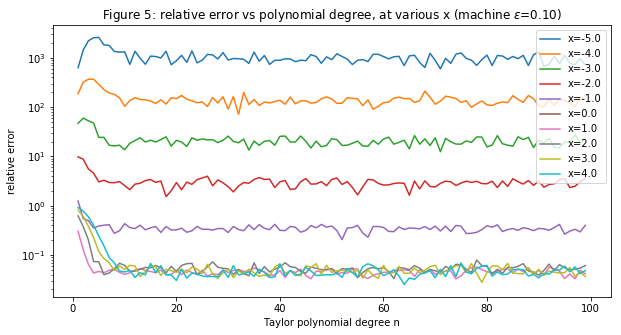

In [79]:
# ----------------------- Figure 5 ------------------------
xlist = range(-5, 5)
nlist = range(1, 100)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(rel_errnlist(nlist,x,eps)) # change errnlist to rel_errnlist here
    for k in range(1,kmax):
        z=np.abs(rel_errnlist(nlist,x,eps)) # change errnlit to rel_errnlist here
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Figure 5: relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('relative error')
plt.legend()
plt.show()

Figure 3:
* The relative error increases more quickly than the absolute error as $x \to -\infty$.
    * This makes sense as $e^x$ gets very small as $x \to -\infty$.
    * The relative error also increases slower as $n$ increases (for $x \to -\infty$).
* The relative error plateaus at 1, whereas the absolute error tends to infinity as $x \to \infty$.
    * This makes sense as $e^x$ grows very large as $x \to \infty$ and dominates the error.

Figure 4:
* The relative error trend behaves like the absolute trend, but the relative error is approximately 10 times smaller than the relative error.
    * The error is smaller since we are dividing by $e^2$. The errors have not plateaued yet, as $x$ is relatively small and we only see up to the $9$th partial sum.

Figure 5:
* For $x > 0$, the relative error threshold plateaus around the same value (at around $10^{-1.5}$).
* for $x \le 0$, the relative error thresholds are all evenly spaces, implying that the threshold grows exponentially as $x \to -\infty$ (since the $y$-axis is in a logarithmic scale).
* These results give a different view of Figure 3.

**4.2.** 
Now we study the effects of $x$ and machine $\varepsilon$ on the absolute error and relative error of $\sin x$. We first modify the given code to calculate the errors with respect to $\sin x$. sinser, sinserlist, sin_errxlist, sin_errelist, sin_errnlist, sin_rel_errxlist, sin_rel_errelist, and sin_rel_errnlist are the functions that perform the same computation as expser, expserlist, errxlist, errelist, errnlist, rel_errxlist, rel_errelist, and rel_errnlist, respectively, but use $\sin x$ instead of $e^x$. 

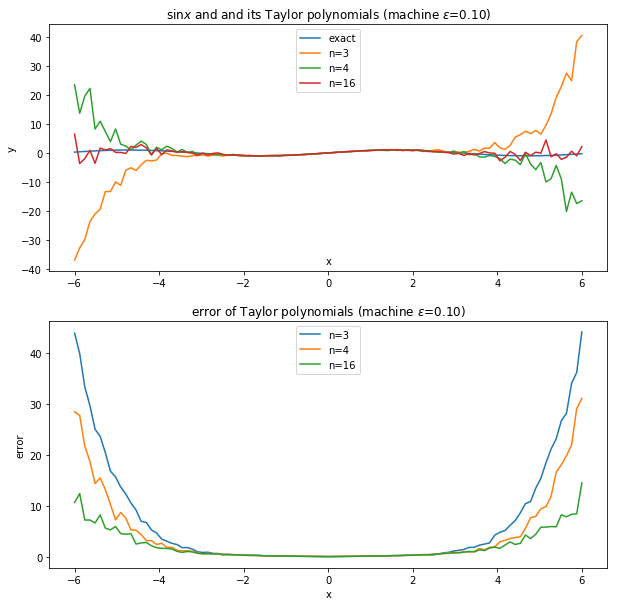

In [88]:
def sinser(n,x,eps=0):
    j=1 # controls the sign of the terms
    b=1
    y=0 # the summation starts with x, so no need to add 1
    
    # should continue to 2n-1 since the even terms are omitted
    for i in range(1, 2*n):
        b*=float(x)/i
        if i % 2 == 0: # omit the even terms
            continue
        r=2*eps*rn.random()-eps
        y+=j*b*(1.+r)
        j*=-1
    return y

def sinserlist(n,xlist,eps=0):
    ylist = []
    for x in xlist:
        ylist.append(sinser(n,x,eps))
    return ylist

def sin_errxlist(n,xlist,eps):
    yy = []
    for x in xlist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy

def sin_errelist(n,x,elist):
    yy = []
    for eps in elist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy

def sin_errnlist(nlist,x,eps):
    yy = []
    for n in nlist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy

def sin_rel_errxlist(n, xlist, eps):
    yy = []
    for x in xlist:
        e = np.sin(x)
        yy.append(np.abs(sinser(n, x, eps) - e)/e)
    return yy

def sin_rel_errelist(n, x, elist):
    yy = []
    for eps in elist: 
        e = np.sin(x)
        yy.append(np.abs(sinser(n, x, eps) - e)/e)
    return yy

def sin_rel_errnlist(nlist, x, eps):
    yy = []
    for n in nlist: 
        e = np.sin(x)
        yy.append(np.abs(sinser(n, x, eps) - e)/e)
    return yy

xlist = np.linspace(-6, 6, 100)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.sin(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,sinserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(sin_errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(sin_errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$\sin x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

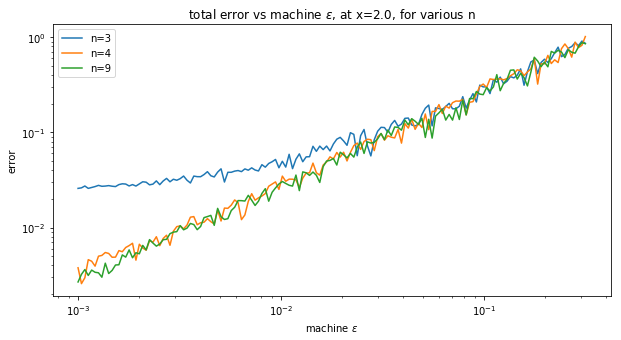

In [81]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(sin_errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(sin_errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.yscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

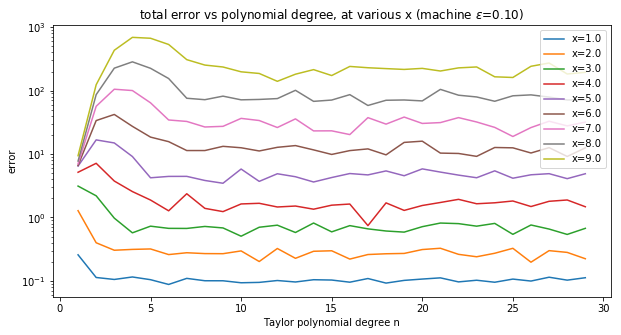

In [82]:
xlist = range(1, 10)
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(sin_errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(sin_errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

We first notice for a fixed $\varepsilon = 0.1$, the error threshold are evenly spaced as $x$ increases linearly in the "total error vs polynomial degree" graph. Since the error scale is logarithmic, we can see that the error depends on $x$ exponentially. From the "total error vs machine $\varepsilon$" we can see that the error increases linearly with respect to machine $\varepsilon$.

**4.3.**
Now we study the behavior of the relative error. We have already defined the relavent functions.

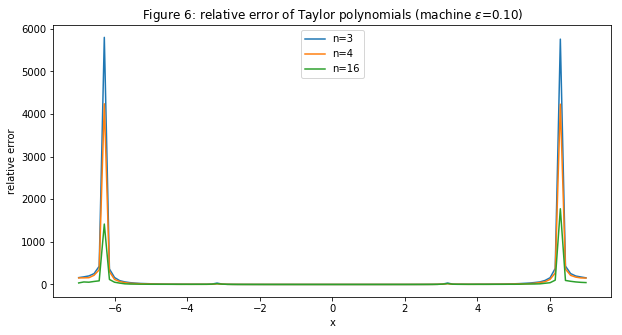

In [91]:
xlist = np.linspace(-7, 7, 100)
nlist = [3,4,16]
eps=.1
kmax=30

plt.figure(figsize=(10,5))

for n in nlist: 
    y=np.abs(sin_rel_errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(sin_rel_errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    plt.plot(xlist,y,label='n=%d'%n)

plt.title(r'Figure 6: relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('x')
plt.ylabel('relative error')
plt.legend(loc="upper center")
plt.show()

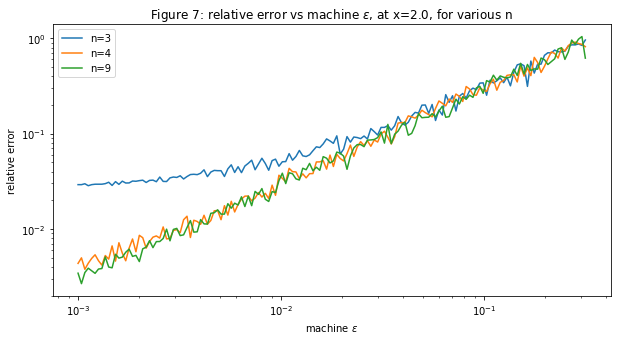

In [87]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(sin_rel_errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(sin_rel_errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.yscale('log')
plt.title(r'Figure 7: relative error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('relative error')
plt.legend()
plt.show()

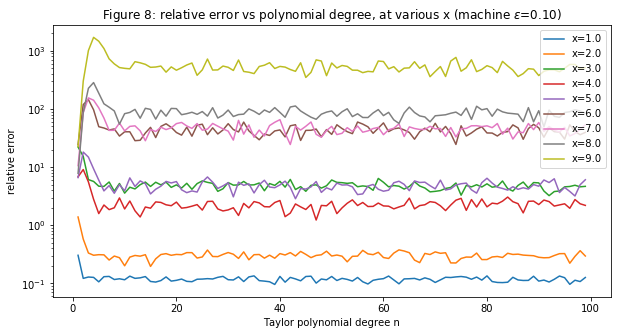

In [93]:
xlist = range(1, 10)
nlist = range(1, 100)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(sin_rel_errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(sin_rel_errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Figure 8: relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('relative error')
plt.legend()
plt.show()

Figure 6:
* The relative error increases more quickly than the absolute error as $x \to \pm\infty$.
    * This makes sense as the the error grows, $\sin x$ cycles. We can also see spikes around $\pm\pi$ and $\pm 2\pi$ $(k\pi\ \forall k \in \mathbb{Z})$ as the derivative of $sin x$ is the greatest at those points.
    * The relative error also decreases as $n$ increases (for $x \to \pm\infty$).
* The relative error plateaus at 1, whereas the absolute error tends to infinity as $x \to \infty$, which makes sense since the computed value is getting closer to the true value.

Figure 7:
* The relative error trend behaves like the absolute trend, which makes sense since $|\sin x| \le 1$.

Figure 8:
* This graph gives a different view of Figure 6. Just by looking at this graph, we can tell that the threshold increases as $|x|$ increases, but it does not seem to increase exponentially, as the thresholds are not evenly spaced. However, looking back to Figure 6, we can see that there are spikes around $k\pi\ (k = |3|, )$